In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [3]:
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=10, shuffle=False)
train_loader

In [11]:
for images, labels  in train_loader:
    break

In [12]:
images.shape

torch.Size([10, 1, 28, 28])

In [13]:
images[0][0].shape

torch.Size([28, 28])

In [15]:
print(f"Lebels : {labels.numpy()}")
print(f"Class names : {np.array([class_names[i] for i in labels])}")

Lebels : [4 2 7 0 1 3 1 1 4 1]
Class names : ['Coat' 'Sweater' 'Sneaker' 'T-shirt' 'Trouser' 'Dress' 'Trouser'
 'Trouser' 'Coat' 'Trouser']


In [20]:
var = np.transpose(images[0].numpy(), (1,2,0))
var.shape

(28, 28, 1)

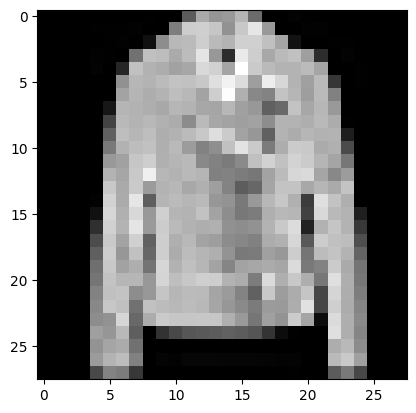

In [21]:
plt.imshow(np.transpose(images[0].numpy(), (1,2,0)), cmap="gray")

Lebels : [4 2 7 0 1 3 1 1 4 1]
Class names : ['Coat' 'Sweater' 'Sneaker' 'T-shirt' 'Trouser' 'Dress' 'Trouser'
 'Trouser' 'Coat' 'Trouser']


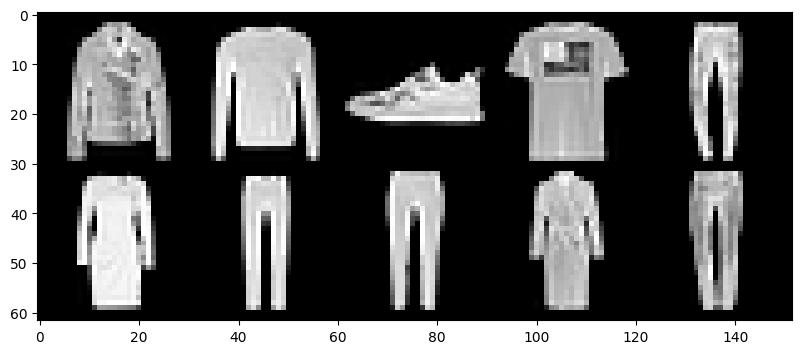

In [23]:
im = make_grid(images, nrow=5) # the default nrow is 8

print(f"Lebels : {labels.numpy()}")
print(f"Class names : {np.array([class_names[i] for i in labels])}")

plt.figure(figsize=(12, 4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [29]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
        self.con2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.con2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

    
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (con2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f"{item:>8}")
    print(f"_____\n{sum(params)}")

count_parameters(model=model)

      54
       6
     864
      16
   48000
     120
   10080
      84
     840
      10
_____
60074


#### Define loss function & optimizer

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Train the model

In [32]:
epochs = 5
for i in range(epochs):
    for X_train, y_train in train_loader:

        #Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        #Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'{i+1} of {epochs} epochs completed')

1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


#### Evaluate the model

In [33]:
model.eval()
with torch.no_grad():
    correct_predoction = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        correct_predoction += (predicted == y_test).sum()

print(f'Test accuracy: {correct_predoction.item()}/{len(test_data)} = {correct_predoction.item()*100/(len(test_data)):7.3f}%')


Test accuracy: 8777/10000 =  87.770%
